
# 1: Data Warm-Up

## What I can do:
- Explore the Dataset -- using Python's Pandas.
    - Upload the CSV file to this machine.
    - Load the dataset from the CSV file.
    - Get general information about the data.
    
- Basic exploratory questions using Python.
- Basic data visualisation using Python.

## 1.   Explore the Dataset -- using Python's `Pandas`
### 1.1   Upload the CSV file to this machine.
### 1.2   Load the dataset from the CSV file:

In [1]:
import pandas as pd
df = pd.read_csv('./LondonCars2014.csv')

### 1.3   Get general information about the data:



In [2]:
df.head()

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
0,Toyota,Avalon XLE,2014,4725,28995,Sedan,Gray,Black,6 Cyl,Automatic,4
1,Ford,Escape SE,2014,17201,24994,SUV,Silver,Black,4 Cyl,Automatic,4
2,Hyundai,Santa Fe Sport,2014,6279,25998,SUV,Silver,Gray,4 Cyl,Automatic,4
3,Ford,Escape SE,2014,16262,26684,SUV,Black,Black,4 Cyl,Automatic,4
4,Jeep,Grand Cherokee Limited Edition,2014,35572,33440,SUV,Black,Black,6 Cyl,Automatic,4


We have noticed that the data-types are not exactly correct. For instance, the type for the `Doors` attribute (column) is inferred as numeric (64-bit integer), so we need to fix them.

In [3]:
df = df.astype({'Make':'category', 'Model':'category', 'Year':'category', 
                'Mileage':'int32', 'Price':'int64', 'Body Style':'category', 
                'Ex Color':'category' , 'In Color':'category', 
                'Engine':'category', 'Transmission':'category', 'Doors':'category'})

Now, use the `info` method again to check if it had the desired effect:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Make          9080 non-null   category
 1   Model         9080 non-null   category
 2   Year          9080 non-null   category
 3   Mileage       9080 non-null   int32   
 4   Price         9080 non-null   int64   
 5   Body Style    9080 non-null   category
 6   Ex Color      9080 non-null   category
 7   In Color      9080 non-null   category
 8   Engine        9080 non-null   category
 9   Transmission  9080 non-null   category
 10  Doors         9080 non-null   category
dtypes: category(9), int32(1), int64(1)
memory usage: 239.9 KB




## 2. Basic exploratory questions using Python



Here we compute various summary statistics, which are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers. 


In [5]:
print(df.shape)

(9080, 11)


In [6]:
# a pandas dataframe has an attribute called columns:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Mileage', 'Price', 'Body Style', 'Ex Color',
       'In Color', 'Engine', 'Transmission', 'Doors'],
      dtype='object')


In [7]:
# the "unique" method helps: 
print('Possible body styles:')
print(df['Body Style'].unique())

Possible body styles:
['Sedan', 'SUV', 'Hatchback', 'Wagon', 'Coupe', 'Minivan', 'Van', 'Pickup', 'Convertible', 'Chassis']
Categories (10, object): ['Sedan', 'SUV', 'Hatchback', 'Wagon', ..., 'Van', 'Pickup', 'Convertible', 'Chassis']


In [8]:
print(df['Doors'].value_counts())

4    8221
2     766
3      93
Name: Doors, dtype: int64


In [9]:
# the average price of a Honda car versus a Mercedes-Benz car?

# For Honda:
print('Average price of a Honda car = {:.2f}'.format(df[df['Make'] == 'Honda']['Price'].mean()))
# For Mercedes-Benz:
print('Average price of a Mercedes-Benz car = {:.2f}'.format(df[df['Make'] == 'Mercedes-Benz']['Price'].mean()))


Average price of a Honda car = 18337.49
Average price of a Mercedes-Benz car = 37620.97


It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values. 


In [10]:
df.describe(include='all')

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
count,9080,9080,9080.0,9080.000000,9080.000000,9080,9080,9080,9080,9080,9080.0
unique,49,1060,24.0,NaN,NaN,10,15,9,10,2,3.0
top,Nissan,Altima S,2011.0,NaN,NaN,Sedan,Black,Black,6 Cyl,Automatic,4.0
freq,1035,197,2641.0,NaN,NaN,3905,2404,4164,4313,8797,8221.0
mean,NaN,NaN,NaN,41875.531057,24410.926652,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,33146.564303,16300.355339,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1490.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,20112.250000,15987.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,33532.000000,21500.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,52564.500000,28998.000000,NaN,NaN,NaN,NaN,NaN,NaN


Note that count refers to the number of non-missing values for each attribute.

In [11]:
print('Covariance:')
df.cov()

Covariance:


,Mileage,Price
Mileage,1.098695e+09,-2.188586e+08
Price,-2.188586e+08,2.657016e+08


In [12]:
print('Correlation:')
df.corr()

Correlation:


,Mileage,Price
Mileage,1.000000,-0.405068
Price,-0.405068,1.000000


---

## 3. Basic data visualisation using Python


Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships among data items or attributes can be analyzed or reported. 


---
> To display the histogram for the milieage attribute by discretizing it into 8 separate bins and counting the frequency for each bin, run this code:

**<font color="red"></font>**

<AxesSubplot:>

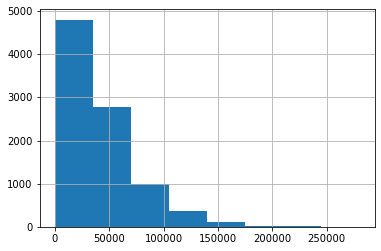

In [13]:
%matplotlib inline

df['Mileage'].hist(bins=8)

> A boxplot can also be used to show the distribution of values for each attribute.

**<font color="red"></font>**

<AxesSubplot:>

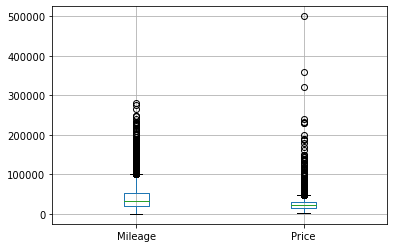

In [14]:
df.boxplot()

> We can finally plot pairwise relationships in a dataset by running the code below. By default, this function will create a grid of axes such that each numeric variable in our dataset will be shared across the y-axes across a single row and the x-axes across a single column. In the diagonal plots, a univariate distribution plot is drawn to show the marginal distribution of the data in each column. Here scatterplot() is used for each pairing of the variables and histplot() for the marginal plots along the diagonal.

**<font color="red"></font>**

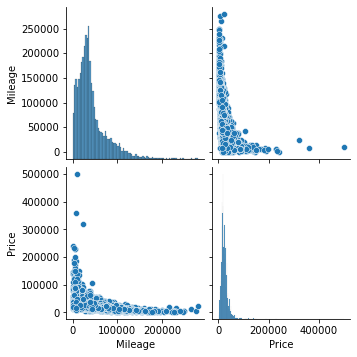

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)